Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



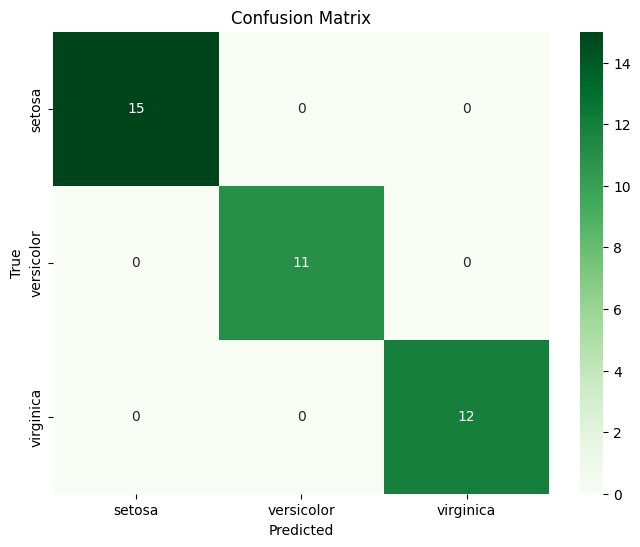

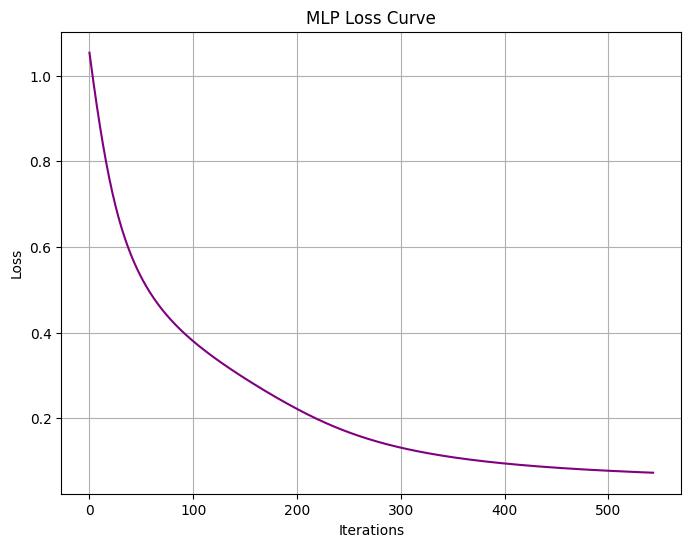

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Feature scaling for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset with a different test size
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

# Initialize the MLPClassifier with modified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='tanh',
    solver='adam',
    max_iter=1500,
    random_state=42
)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with a different color map
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the loss curve to visualize training progress
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_, color='purple')
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
